In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot

In [9]:
df = pd.read_csv('Housing.csv')

# For Simplicity we'll take only the numerical Columns
df = df.select_dtypes("number")

df.sample(5)

,price,area,bedrooms,bathrooms,stories,parking
301,4200000,3520,3,1,2,0
351,3780000,3600,2,1,1,0
371,3640000,3570,3,1,2,0
17,8960000,8500,3,2,4,2
270,4340000,4500,3,2,3,1


In [10]:
df.shape

(545, 6)

In [11]:
df.isnull().sum()

price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   stories    545 non-null    int64
 5   parking    545 non-null    int64
dtypes: int64(6)
memory usage: 25.7 KB


<h3>1. Linearity</h3>

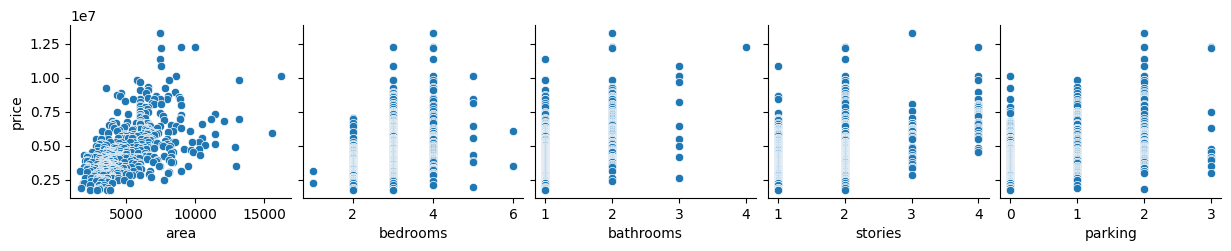

In [22]:
# First Assumption ( linear (straight-line) relationship between Y and the X’s.)
sns.pairplot(df , x_vars= df.drop(columns=['price']).columns , y_vars= ["price"] ,kind= "scatter")

<h3>2. No Multicollinearity</h3>

<Axes: >

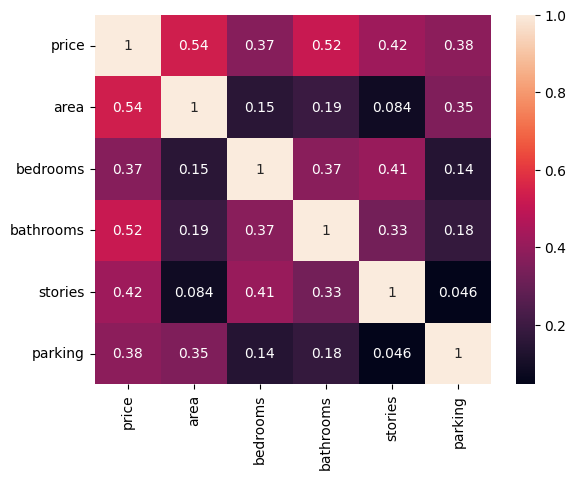

In [24]:
# multicollinearity occurs whenin dependent variables are highly correlated with eachother

sns.heatmap(df.corr() , annot= True)

In [25]:
# to mean Normlise the bathroom coulmn to reduce corr
df["bedrooms"] = df['bathrooms'].apply(lambda x: x - df['bathrooms'].mean())

<Axes: >

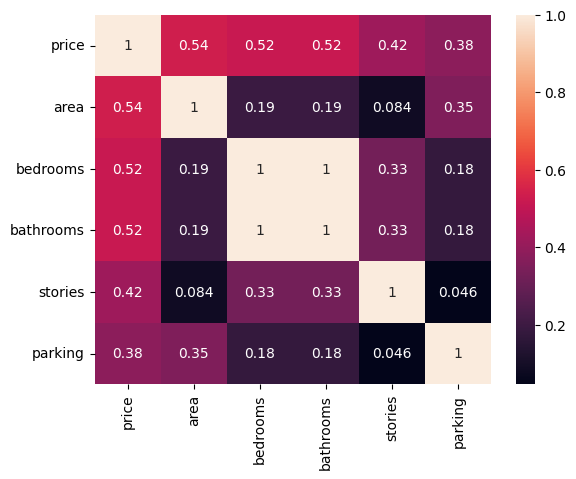

In [26]:
# multicollinearity occurs whenin dependent variables are highly correlated with eachother
sns.heatmap(df.corr() , annot= True)
# now heatmap gives us correlation coefficients of each feature with respect toone another which are in turn lessthan 0.4.

<h3>3. Homoscedasticity</h3>

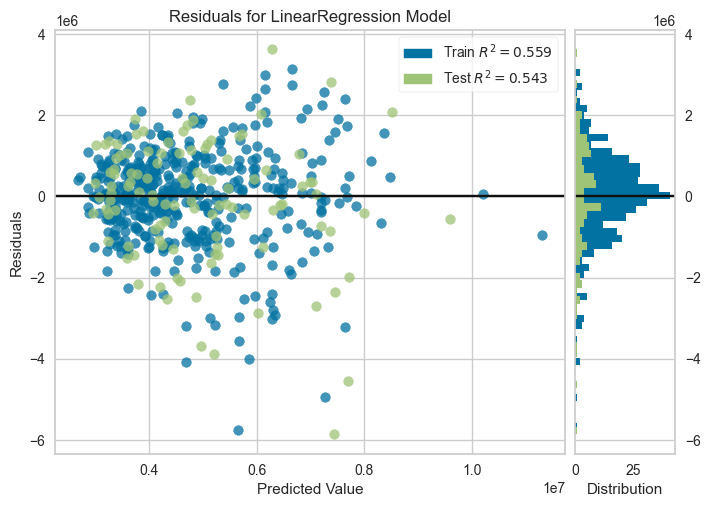

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [32]:
# The variance of the ℇ’s(error) is constant for all values of the X’s(indepedent).
y = df['price']
X = df.drop(columns= ['price'])
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state= 42 )

lr = LinearRegression()
visualizer = ResidualsPlot(lr)
visualizer.fit(X_train , y_train)
visualizer.score(X_test , y_test)
visualizer.poof()

In [ ]:
# Random Cloud no discrete pattern so Homoscedasticity

<h3>4. Normality</h3>

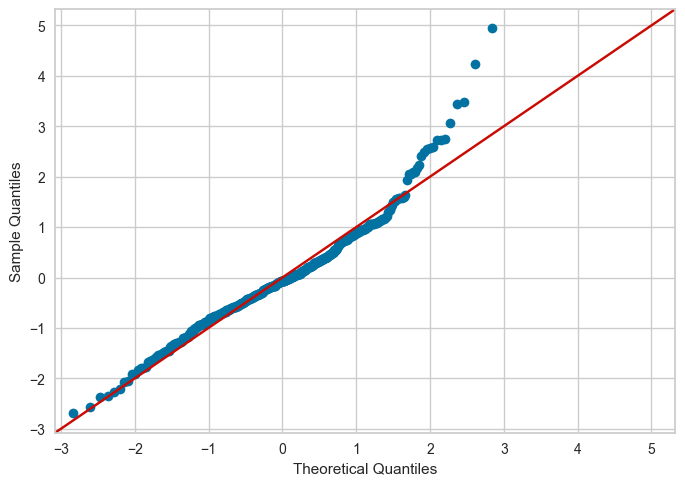

In [37]:
# It assume that ℇ's are normally distributed (Mean zero). 

# check using Q-Q plot

import statsmodels.api as sm
mod_fit = sm.OLS(y_train , X_train).fit()
res = mod_fit.resid
fig = sm.qqplot(res ,fit = True , line = '45')
plt.show()

In [39]:
# The q-q plot of the advertising data set shows that the errors(residuals) are fairly normally distributed.

<h3>5. No Autocorrelation</h3>

In [40]:
# Autocorrelation occurs when the residual errors are dependent on each other.

# Durbin-Watson Test

model = sm.OLS(y_train , X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     136.6
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           2.81e-75
Time:                        23:52:16   Log-Likelihood:                -6709.2
No. Observations:                 436   AIC:                         1.343e+04
Df Residuals:                     431   BIC:                         1.345e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
area         311.9988     27.389     11.391      0.0

In [ ]:
# Durbin-Watson:                   1.925 ~ 2 
# so No correlations